In [1]:
import numpy as np
import pandas as pd
import scipy.sparse 
import multiprocessing as mp
import glob
import re
import time, timeit
import matplotlib.pyplot as plt
import sys
import random
import os
sys.path.insert(1, '../src/mf_algorithms')

from functions import *

In [18]:
test, f, w = createmat(200, 4, 4)

In [19]:
A, S, error = mf(test + 0.0001, k = 4, s = 1, niter = 100, siter = 1, solver = 'als')
print(error)

0.7143985674907027


In [22]:
A, S, error = mf(test + 0.0001, k = 4, s = 1, niter = 1000, siter = 1, solver = 'als')
print(error)

0.08840758897941849


In [16]:
A, S, error = mf(test + 0.0001, k = 4, s = 1, niter = 100, siter = 500, solver = 'brk', errseq = True)
print(error)

[0.79712717 0.73823247 0.66691037 0.73003094 0.72746217 0.74265725
 0.66754784 0.65711243 0.78289713 0.65494256 0.78105771 0.7566822
 0.56421936 0.77411189 0.77974573 0.80643444 0.58898124 0.60252877
 0.51197495 0.47440499 0.52940929 0.48884589 0.50101973 0.47126693
 0.47580468 0.4437456  0.50105059 0.3723964  0.34063506 0.34432169
 0.29372365 0.45040821 0.36513286 0.33467808 0.38575389 0.30328143
 0.28540309 0.3025793  0.29486672 0.2990813  0.26400149 0.21828924
 0.21587049 0.19709885 0.16530155 0.16460573 0.15026927 0.15050536
 0.14124978 0.13870103 0.15063429 0.14965923 0.14100123 0.13613291
 0.15134795 0.1489715  0.1602555  0.15915821 0.14037629 0.12749018
 0.11865746 0.14948443 0.16654808 0.15894897 0.15329249 0.13920309
 0.13269327 0.1491042  0.15701813 0.16207081 0.14993329 0.14786288
 0.1436858  0.14041894 0.1351392  0.12585148 0.1195618  0.12027607
 0.12393578 0.11416941 0.10091101 0.10050802 0.10022992 0.09136336
 0.07007503 0.06619467 0.07816544 0.07822029 0.07958399 0.07465

In [17]:
A, S, error = mf(test + 0.0001, k = 4, s = 1, niter = 100, siter = 500, solver = 'bgs', errseq = True)
print(error)

[0.81477854 0.81615999 1.88999615 1.86560568 2.29802021 2.29857113
 1.5802558  1.71067418 1.78982256 1.70400723 1.68642801 1.68551652
 1.66873046 1.66994746 1.60150046 1.60162482 1.26288192 1.2588816
 1.23767704 1.22484944 1.22149799 0.91995264 0.92205806 0.47876653
 0.46989766 0.47199997 0.49021615 0.47968278 0.49324051 0.31409298
 0.31232785 0.30974082 0.31011476 0.2981864  0.29725166 0.29235841
 0.26805607 0.25687569 0.25649147 0.26430128 0.26173305 0.297904
 0.29689116 0.29662708 0.29520155 0.29847455 0.29015342 0.23276684
 0.21862642 0.20676621 0.20564249 0.20743727 0.21679619 0.20673164
 0.20538538 0.20641212 0.21656986 0.21453774 0.2090232  0.20108788
 0.20102078 0.19503619 0.19377917 0.19373196 0.19254155 0.19260922
 0.1904962  0.19043648 0.19038435 0.18704006 0.18629928 0.17492669
 0.17865295 0.17612746 0.40722098 0.4067625  0.40423146 0.40053048
 0.39991373 0.4001151  0.31118841 0.30612771 0.30543011 0.30435191
 0.28328922 0.28344059 0.26290453 0.25578888 0.24318547 0.2445166

# Speed Comparisons

## RK vs BRK

In [71]:
bfactor200 = np.random.choice(4, size=(200,4), p=np.array([0.7, 0.1, 0.1, 0.1]))
bweight200 = np.random.randint(0, 2, size=(4, 200))
b200 = np.matmul(bfactor200, bweight200)
np.count_nonzero(b200 == 0) / (b200.shape[0]*b200.shape[1])

0.553175

In [5]:
%%time
error = rktest(b200, k = 4, niter = 100, kacziter = 1000)

Wall time: 20.3 s


In [6]:
%%time
error = brktest(b200, k = 4, s = 1, niter = 100, kacziter = 1000)

Wall time: 15.5 s


## ALS vs BRK

In [7]:
%%time
error = alstest(b200, k = 4, niter = 100*1000)

Wall time: 32.1 s


In [8]:
%%time
error = brktest(b200, k = 4, s = 200, niter = 100, kacziter = 1000)

Wall time: 33.8 s


# Sparse Tests

## 50x50 matrix

In [7]:
sfactor50 = np.random.choice(4, size=(50,4), p=np.array([0.7, 0.1, 0.1, 0.1]))
sweight50 = np.random.randint(0, 2, size=(4, 50))
s50 = np.matmul(sfactor50, sweight50)
np.count_nonzero(s50 == 0) / (s50.shape[0]*s50.shape[1])

0.5576

### ALS equivalents

In [20]:
%%time
fname = "Errors/salserr50.txt"
mpmf(s50, k = 4, s = 50, niter = 100, siter = 1, solver = 'als', filename = fname, loop = 15)
salserr50 = np.asarray(read(fname)[:-1]).astype(float)
print(np.mean(salserr50))

0.3784563459000275
Wall time: 1.06 s


In [23]:
%%time
fname = "Errors/sbrkalseqerr50.txt"
brkmp(s50, k = 4, s = 50, niter = 100, kacziter = 1, filename = fname, loop = 15)
sbrkalserr50 = np.asarray(read(fname)[:-1]).astype(float)
print(np.mean(sbrkalserr50))

0.39936603859292163
Wall time: 1.38 s


In [26]:
%%time
fname = "Errors/sbgsalseqerr50.txt"
mpmf(s50, k = 4, s = 4, niter = 100, siter = 1, solver = 'bgs', filename = fname, loop = 15)
sbgsalserr50 = np.asarray(read(fname)[:-1]).astype(float)
print(np.mean(sbgsalserr50))

0.711958928738211
Wall time: 1.33 s


### RK

In [28]:
%%time
fname = "Errors/sbrkrkerr50.txt"
mpmf(s50, k = 4, s = 1, niter = 100, siter = 1000, solver = 'brk' filename = fname, loop = 15)
sbrk1err50 = np.asarray(read(fname)[:-1]).astype(float)
print(sbrk1err50)

[1.32033656 1.16974054 1.1184243  1.31583856 1.53457416 1.4444978
 1.16550199 1.13395952 1.3042208  1.0923523  1.6465193  1.86268653
 2.43920029 1.92523182 1.27917033]
Wall time: 1min 48s


### GS

In [9]:
%%time
fname = "Errors/sgserr50.txt"
mpmf(s50, k = 4, s = 1, niter = 100, siter = 1000, solver = 'bgs', filename = fname, loop = 15)
sgserr50 = np.asarray(read(fname)[:-1]).astype(float)
print(sgserr50)

[0.83283803 0.71198204 0.68514397 1.57775247 0.83096064 0.67237971
 1.05268476 0.89560588 0.70580511 0.78397336 0.77944866 1.32674111
 0.79743416 1.00473809 0.7084457 ]
Wall time: 2min 15s


## 200x200 matrix

In [49]:
sfactor200 = np.random.choice(4, size=(200,4), p=np.array([0.7, 0.1, 0.1, 0.1]))
sweight200 = np.random.randint(0, 2, size=(4, 200))
s200 = np.matmul(sfactor200, sweight200)
np.count_nonzero(s200 == 0) / (s200.shape[0]*s200.shape[1])

0.53285

### ALS Equivalents

In [35]:
%%time
fname = "Errors/salserr200.txt"
alsmp(s200, k = 4, niter = 100, filename = fname, loop = 15)
salserr200 = np.asarray(read(fname)[:-1]).astype(float)
print(np.mean(salserr200))

0.7040887761909862
Wall time: 1.68 s


In [36]:
%%time
fname = "Errors/sbrkalseqerr200.txt"
brkmp(s200, k = 4, s = 200, niter = 100, kacziter = 1, filename = fname, loop = 15)
sbrkalserr200 = np.asarray(read(fname)[:-1]).astype(float)
print(np.mean(sbrkalserr200))

0.7130288751607897
Wall time: 3.41 s


In [34]:
%%time 
fname = "Errors/sbgsalseqerr200.txt"
mpmf(s200, k = 4, s = 4, niter = 100, siter = 1, solver = 'bgs', filename = fname, loop = 15)
sbgsalserr200 = np.asarray(read(fname)[:-1]).astype(float)
print(np.mean(sbgsalserr200))

0.7303242784141906
Wall time: 2.59 s


### RK

In [12]:
%%time
fname = "Errors/srkerr200.txt"
mpmf(s200, k = 4, s = 1, niter = 100, siter = 1000, solver = 'brk', filename = fname, loop = 15)
srkerr200 = np.asarray(read(fname)[:-1]).astype(float)
print(srkerr200)

[0.97452689 1.01434426 0.97148068 0.9707538  1.02133006 0.93398514
 1.09125834 1.17262868 1.00860981 1.00612739 0.97732044 1.09719713
 0.98057376 0.98072695 0.95655076]
Wall time: 2min 44s


### GS (changed siter to 100 due to divergence)

In [53]:
%%time
fname = "Errors/sgserr200.txt"
mpmf(s200, k = 4, s = 1, niter = 100, siter = 100, solver = 'bgs', filename = fname, loop = 15)
sgserr200 = np.asarray(read(fname)[:-1]).astype(float)
print(sgserr200)

[0.7899988  0.80936449 0.85352801 0.79083664 0.7672503  0.90665165
 0.76973343 0.77378501 0.85365175 0.80058141 0.86688861 0.78565461
 0.78090919 0.76281759 1.15001167]
Wall time: 25.9 s


## 1000x1000 matrix

In [51]:
sfactor1k = np.random.choice(4, size=(1000,4), p=np.array([0.7, 0.1, 0.1, 0.1]))
sweight1k = np.random.randint(0, 2, size=(4, 1000))
s1k = np.matmul(sfactor1k, sweight1k)
np.count_nonzero(s1k == 0) / (s1k.shape[0]*s1k.shape[1])

0.527955

### ALS Equivalents

In [3]:
%%time
fname = "Errors/salserr1k.txt"
alsmp(s1k, k = 4, niter = 100, filename = fname, loop = 15)
salserr1k = np.asarray(read(fname)[:-1]).astype(float)
print(salserr1k)

[0.80573552 0.80216327 0.80657376 0.81001677 0.80149177 0.79916573
 0.80612909 0.80201629 0.80344161 0.8027064  0.80175479 0.81126418
 0.80535349 0.80105497 0.81371224]
Wall time: 10.6 s


In [51]:
%%time
fname = "Errors/sbrkalseqerr1k.txt"
brkmp(s1k, k = 4, s = 1000, niter = 100, kacziter = 1, filename = fname, loop = 15)
sbrkalserr1k = np.asarray(read(fname)[:-1]).astype(float)
print(sbrkalserr1k)

[0.80468645 0.80319409 0.79536265 0.80719287 0.80355555 0.80493241
 0.80922782 0.80355501 0.8116088  0.80733801 0.80911881 0.80638145
 0.81220814 0.80492724 0.8078452 ]
Wall time: 21.9 s


In [18]:
%%time
fname = "Errors/sbgsalseq1k.txt"
mpmf(s1k, k = 4, s = 4, niter = 100, siter = 1, solver = 'bgs', filename = fname, loop = 15)
sbgsalserr1k = np.asarray(read(fname)[:-1]).astype(float)
print(sbgsalserr1k)

[0.81950005 0.80863745 0.81322068 0.80558049 0.81193008 0.80086922
 0.81079448 0.81027411 0.80674845 0.80478409 0.80663021 0.81332651
 0.81284605 0.81173419 0.80807004]
Wall time: 21.3 s


### RK

In [7]:
%%time
fname = "Errors/srkerr1k.txt"
rkmp(s1k, k = 4, niter = 100, kacziter = 1000, filename = fname, loop = 15)
srkerr1k = np.asarray(read(fname)[:-1]).astype(float)
print(srkerr1k)

[0.88641108 0.87648101 0.87082716 0.89640972 0.87717439 0.87105896
 0.88792621 0.87883637 0.86367441 0.88813589 0.87110583 0.88036848
 0.89750798 0.85798538 0.87502365]
Wall time: 4min 34s


### GS (changed siter to 100 due to divergence)

In [54]:
%%time
fname = "Errors/sgserr1k.txt"
mpmf(s1k, k = 4, s = 1, niter = 100, siter = 100, solver = 'bgs', filename = fname, loop = 15)
sbrk1err1k = np.asarray(read(fname)[:-1]).astype(float)
print(sbrk1err1k)

[0.82040405 0.81798795 0.85724558 0.82973605 0.82476536 0.82550487
 0.81949681 0.82728039 0.84403658 0.85681315 0.82922477 0.83364835
 0.82209199 0.84300932 0.81823622]
Wall time: 52.2 s


## 10,000x10,000 matrix

In [17]:
sfactor10k = np.random.choice(4, size=(10000,4), p=np.array([0.7, 0.1, 0.1, 0.1]))
sweight10k = np.random.randint(0, 2, size=(4, 10000))
s10k = np.matmul(sfactor10k, sweight10k)
np.count_nonzero(s10k == 0) / (s10k.shape[0]*s10k.shape[1])

0.52088636

### ALS Equivalents

In [5]:
%%time
fname = "Errors/salserr10k.txt"
alsmp(s10k, k = 4, niter = 100, filename = fname, loop = 15, cores = 4)
salserr10k = np.asarray(read(fname)[:-1]).astype(float)
print(salserr10k)

[0.82840739 0.82504429 0.82773252 0.82928556 0.82763171 0.8285348
 0.82737003 0.82887042 0.82889542 0.82897594 0.82679751 0.82827703
 0.82912263 0.82773023 0.82671306]
Wall time: 15min 20s


In [52]:
%%time
fname = "Errors/sbrkalseqerr10k.txt"
brkmp(s10k, k = 4, s = 10000, niter = 100, kacziter = 1, filename = fname, loop = 15, cores = 4)
brkalserr10k = np.asarray(read(fname)[:-1]).astype(float)
print(brkalserr10k)

[0.82773557 0.82942461 0.82791668 0.82909525 0.82925004 0.82947858
 0.82909411 0.83063437 0.82959144 0.83049439 0.82952473 0.83027397
 0.82939801 0.82943205 0.8308798 ]
Wall time: 30min 26s


In [20]:
%%time
fname = "Errors/sbgsalseqerr10k.txt"
mpmf(s10k, k = 4, s = 4, niter = 100, siter = 1, solver = 'bgs', filename = fname, loop = 15)
sbgsalserr1k = np.asarray(read(fname)[:-1]).astype(float)
print(sbgsalserr1k)

[0.82713469 0.82571603 0.82763985 0.82688824 0.82649319 0.82582404
 0.82688659 0.82568241 0.82722545 0.82797018 0.82713509 0.82598235
 0.82749066 0.82655333 0.82719164]
Wall time: 30min 4s


### RK

In [9]:
%%time
fname = "Errors/srkerr10k.txt"
rkmp(s10k, k = 4, niter = 100, kacziter = 1000, filename = fname, loop = 15)
srkerr10k = np.asarray(read(fname)[:-1]).astype(float)
print(srkerr10k)

[0.83784642 0.83996678 0.83579206 0.83571418 0.83853128 0.83606556
 0.83801145 0.83896365 0.83622823 0.83440343 0.83702825 0.83597302
 0.83761736 0.83844967 0.83806877]
Wall time: 53min 39s


### GS

In [21]:
%%time
fname = "Errors/sgserr10k.txt"
mpmf(s10k, k = 4, s = 1, niter = 100, siter = 1, solver = 'bgs', filename = fname, loop = 15)
sgserr10k = np.asarray(read(fname)[:-1]).astype(float)
print(sgserr10k)

[0.82879126 0.82784684 0.82934316 0.82700183 0.82733364 0.82821652
 0.82686396 0.82642747 0.82703179 0.82743436 0.82808364 0.82778912
 0.82786687 0.82899422 0.82966689]
Wall time: 29min 55s


## Error Plots

In [5]:
datapath = 'Errors/*.txt'
datafiles = list(glob.glob(datapath))

In [6]:
alstitle, alserr, alsstd = extracterr("salserr", datafiles)
rktitle, rkerr, rkstd = extracterr("srk", datafiles)
gstitle, gserr, gsstd = extracterr("sgs", datafiles)
brkalstitle, brkalserr, brkalsstd = extracterr("sbrkalseq", datafiles)
bgsalstitle, bgsalserr, bgsalsstd = extracterr("sbgsalseq", datafiles)

In [7]:
print(brkalserr)
print(alserr)
print(bgsalserr)

[0.39936603859292163, 0.7130288751607897, 0.8060756337201688, 0.829481572339329]
[0.3784563459000275, 0.7040887761909862, 0.8048386584099326, 0.8279592361570021]
[0.711958928738211, 0.7303242784141906, 0.826787582936639, 0.8096630730148843]


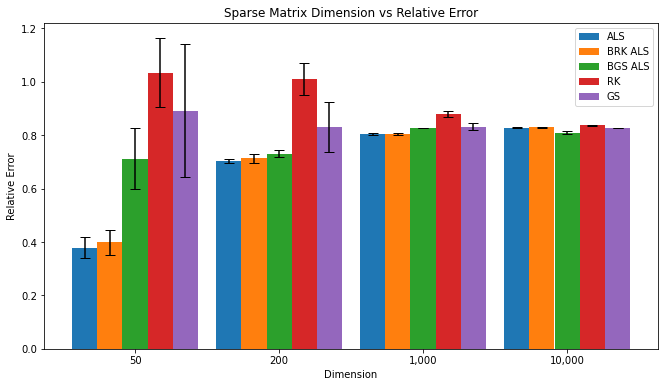

In [58]:
n = len(alserr)
ind = 2*np.arange(n)  # the x locations for the groups
width = 0.35       # the width of the bars

fig = plt.figure(figsize=(11,6))
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, alserr, width, yerr=alsstd, capsize=5)
rects2 = ax.bar(ind+width, brkalserr, width, yerr=brkalsstd, capsize=5)
rects3 = ax.bar(ind+2*width, bgsalserr, width, yerr=bgsalsstd, capsize=5)
rects4 = ax.bar(ind+3*width, rkerr, width, yerr=rkstd, capsize=5)
rects5 = ax.bar(ind+4*width, gserr, width, yerr=gsstd, capsize=5)


# add some
ax.set_ylabel('Relative Error')
ax.set_xlabel('Dimension')
ax.set_title('Sparse Matrix Dimension vs Relative Error')
ax.set_xticks(ind + 2*width)
ax.set_xticklabels( ('50', '200', '1,000', '10,000') )

ax.legend( (rects1[0], rects2[0], rects3[0], rects4[0], rects5[0]), ('ALS', 'BRK ALS', 'BGS ALS', 'RK', 'GS') )

plt.show()
#plt.savefig('fixedrkerrorplot.png')

# Dense Tests

## 50x50 matrix

In [87]:
dfactor50 = np.random.choice(4, size=(50,4), p=np.array([0.7, 0.1, 0.1, 0.1]))
dweight50 = np.random.randint(0, 2, size=(4, 50))
d50 = np.matmul(dfactor50, dweight50)
np.count_nonzero(d50 == 0) / (d50.shape[0]*d50.shape[1])

0.4848

In [6]:
%%time
fname = "Errors/dalserr50.txt"
alsmp(d50, k = 4, niter = 100, filename = fname, loop = 15)
dalserr50 = np.asarray(read(fname)[:-1]).astype(float)
print(dalserr50)

[0.43371888 0.37504556 0.4476757  0.25585386 0.38419529 0.26802343
 0.32854191 0.4541685  0.37170317 0.27079105 0.32981316 0.33864429
 0.35125232 0.31467782 0.32253532]
Wall time: 1.73 s


In [89]:
%%time
fname = "Errors/dbrk1err50.txt"
brkmp(d50, k = 4, s = 50, niter = 100, kacziter = 1000, filename = fname, loop = 15)
dbrk50err50 = np.asarray(read(fname)[:-1]).astype(float)
print(dbrk50err50)

[0.41415609 0.34322362 0.34145347 0.38875901 0.3741523  0.43157208
 0.45474056 0.39762268 0.38052936 0.43843742 0.37274034 0.3644743
 0.43603401 0.41680571 0.40379223]
Wall time: 1min 42s


In [7]:
%%time
fname = "Errors/drkerr50.txt"
rkmp(d50, k = 4, niter = 100, kacziter = 1000, filename = fname, loop = 15)
drkerr50 = np.asarray(read(fname)[:-1]).astype(float)
print(drkerr50)

[0.82063677 0.9265537  0.94625839 0.93323904 1.13555342 0.96528852
 0.93338154 0.9885525  0.98971829 1.01658153 0.89295443 0.93343437
 0.84803218 1.20651647 1.00107148]
Wall time: 1min 11s


In [90]:
%%time
fname = "Errors/dbrk1err50.txt"
brkmp(d50, k = 4, s = 1, niter = 100, kacziter = 1000, filename = fname, loop = 15)
dbrk1err50 = np.asarray(read(fname)[:-1]).astype(float)
print(dbrk1err50)

[1.4388372  1.56553274 1.33707225 1.4369941  1.46693641 1.0906025
 1.5531184  1.05047844 1.22225224 1.37898488 1.54443979 1.22154177
 1.20378635 1.18534703 1.43369847]
Wall time: 1min 8s


## 200x200 matrix

In [92]:
dfactor200 = np.random.choice(4, size=(200,4), p=np.array([0.7, 0.1, 0.1, 0.1]))
dweight200 = np.random.randint(0, 2, size=(4, 200))
d200 = np.matmul(dfactor200, dweight200)
np.count_nonzero(d200 == 0) / (d200.shape[0]*d200.shape[1])

0.5397

In [9]:
%%time
fname = "Errors/dalserr200.txt"
alsmp(d200, k = 4, niter = 100, filename = fname, loop = 15)
dalserr200 = np.asarray(read(fname)[:-1]).astype(float)
print(dalserr200)

[0.71115283 0.67016919 0.69945936 0.70162428 0.71926671 0.71245664
 0.71715277 0.70377826 0.70599016 0.70705302 0.70836051 0.69214348
 0.71275215 0.71835256 0.67173452]
Wall time: 1.22 s


In [93]:
%%time
fname = "Errors/dbrk200err200.txt"
brkmp(d200, k = 4, s = 200, niter = 100, kacziter = 1000, filename = fname, loop = 15)
dbrk200err200 = np.asarray(read(fname)[:-1]).astype(float)
print(dbrk200err200)

[0.70033598 0.71734413 0.68968251 0.75412031 0.69908387 0.71498477
 0.72166805 0.73231394 0.70659329 0.7350821  0.73490232 0.71862133
 0.7310454  0.7363544  0.71108027]
Wall time: 5min 15s


In [10]:
%%time
fname = "Errors/drkerr200.txt"
rkmp(d200, k = 4, niter = 100, kacziter = 1000, filename = fname, loop = 15)
drkerr200 = np.asarray(read(fname)[:-1]).astype(float)
print(drkerr200)

[1.01963463 0.97079728 1.03464515 0.95089754 0.95455478 1.00505888
 0.92972789 0.951526   1.01876916 0.96120489 0.96973967 0.98574261
 0.97856256 0.98248655 0.95849656]
Wall time: 1min 42s


In [94]:
%%time
fname = "Errors/dbrk1err200.txt"
brkmp(d200, k = 4, s = 1, niter = 100, kacziter = 1000, filename = fname, loop = 15)
dbrk1err200 = np.asarray(read(fname)[:-1]).astype(float)
print(dbrk1err200)

[1.10238265 1.1670957  1.09057127 1.08099275 1.04033725 1.1155012
 1.21004994 1.17422411 1.11786864 1.03789822 1.13433232 1.05853215
 1.17790668 1.39008514 1.0656367 ]
Wall time: 1min 22s


## 1000x1000 matrix

In [67]:
dfactor1k = np.random.choice(4, size=(1000,4), p=np.array([0.7, 0.1, 0.1, 0.1]))
dweight1k = np.random.randint(0, 2, size=(4, 1000))
d1k = np.matmul(dfactor1k, dweight1k)
np.count_nonzero(d1k == 0) / (d1k.shape[0]*d1k.shape[1])

0.525664

In [12]:
%%time
fname = "Errors/dalserr1k.txt"
alsmp(d1k, k = 4, niter = 100, filename = fname, loop = 15)
dalserr1k = np.asarray(read(fname)[:-1]).astype(float)
print(dalserr1k)

[0.80175321 0.8093114  0.80925409 0.81665466 0.81168322 0.80925443
 0.81157313 0.80596311 0.81263762 0.80673858 0.80446207 0.80468717
 0.81520691 0.81214437 0.80760215]
Wall time: 10.6 s


In [ ]:
%%time
fname = "Errors/dbrk1err1k.txt"
brkmp(d1k, k = 4, s = 1, niter = 100, filename = fname, loop = 15)
dbrk1err1k = np.asarray(read(fname)[:-1]).astype(float)
print(dbrk1err1k)

In [68]:
%%time
fname = "Errors/drkerr1k.txt"
rkmp(d1k, k = 4, niter = 100, kacziter = 1000, filename = fname, loop = 15)
drkerr1k = np.asarray(read(fname)[:-1]).astype(float)
print(drkerr1k)

[0.87200605 0.87216129 0.88213478 0.87679657 0.86320041 0.89580873
 0.89142686 0.87965736 0.88007234 0.87006469 0.86548832 0.8723532
 0.87471097 0.87264556 0.86120275]
Wall time: 4min 28s


In [ ]:
%%time
fname = "Errors/dbrk1kerr1k.txt"
brkmp(d1k, k = 4, s = 1000, niter = 100, filename = fname, loop = 15)
dbrk1kerr1k = np.asarray(read(fname)[:-1]).astype(float)
print(dbrk1kerr1k)

## 10,000x10,000 matrix

In [69]:
dfactor10k = np.random.choice(4, size=(10000,4), p=np.array([0.7, 0.1, 0.1, 0.1]))
dweight10k = np.random.randint(0, 2, size=(4, 10000))
d10k = np.matmul(dfactor10k, dweight10k)
np.count_nonzero(d10k == 0) / (d10k.shape[0]*d10k.shape[1])

0.52765071

In [4]:
%%time
fname = "Errors/dalserr10k.txt"
alsmp(d10k, k = 4, niter = 100, filename = fname, loop = 15, cores = 4)
dalserr10k = np.asarray(read(fname)[:-1]).astype(float)
print(dalserr10k)

[0.82758483 0.82759903 0.82615887 0.82560387 0.82811139 0.82593277
 0.82680554 0.82897845 0.82587531 0.82538244 0.82798453 0.82888699
 0.82907092 0.82791305 0.8254652 ]
Wall time: 15min 8s


In [ ]:
%%time
fname = "Errors/dbrk1err10k.txt"
brkmp(d10k, k = 4, s = 1, niter = 100, filename = fname, loop = 15, cores = 4)
dbrk1err10k = np.asarray(read(fname)[:-1]).astype(float)
print(dbrk1err10k)

In [70]:
%%time
fname = "Errors/drkerr10k.txt"
rkmp(d10k, k = 4, niter = 100, kacziter = 1000, filename = fname, loop = 15, cores = 4)
drkerr10k = np.asarray(read(fname)[:-1]).astype(float)
print(drkerr10k)

[0.83651625 0.8386287  0.83683639 0.83737113 0.83663193 0.83741887
 0.83551104 0.83579547 0.83489275 0.83846479 0.836588   0.83458544
 0.83558222 0.83657496 0.83836295]
Wall time: 58min 38s


In [ ]:
%%time
fname = "Errors/dbrk1err10k.txt"
brkmp(d10k, k = 4, s = 10000, niter = 100, filename = fname, loop = 15, cores = 4)
dbrk10kerr10k = np.asarray(read(fname)[:-1]).astype(float)
print(dbrk10kerr10k)

## Error Plots

In [139]:
datapath = 'Errors/*.txt'
datafiles = list(glob.glob(datapath))
alstitle, alserr, alsstd = extracterr("dals", datafiles)
rktitle, rkerr, rkstd = extracterr("drk", datafiles)

In [140]:
print(alstitle)
print(rktitle)

['50', '200', '1k', '10k']
['50', '200', '1k', '10k']


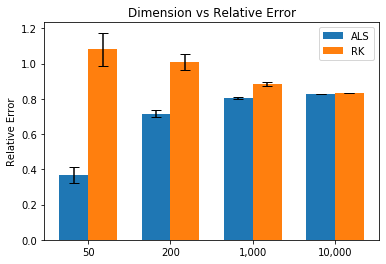

In [162]:
n = len(alserr)
ind = np.arange(n)  # the x locations for the groups
width = 0.35       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, alserr, width, yerr=alsstd, capsize=5)

rects2 = ax.bar(ind+width, rkerr, width, yerr=rkstd, capsize=5)

# add some
ax.set_ylabel('Relative Error')
ax.set_title('Dimension vs Relative Error')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels( ('50', '200', '1,000', '10,000') )

ax.legend( (rects1[0], rects2[0]), ('ALS', 'RK') )

plt.show()

# BRK Sampling Tests

## Varying k

In [2]:
bfactor200 = np.random.choice(4, size=(200,4), p=np.array([0.7, 0.1, 0.1, 0.1]))
bweight200 = np.random.randint(0, 2, size=(4, 200))
b200 = np.matmul(bfactor200, bweight200)
np.count_nonzero(b200 == 0) / (b200.shape[0]*b200.shape[1])

0.5611

In [4]:
%%time
i = 2
while(i <= 10):
    fname = "Errors/BRK/sbrk" + str(i) + "err200test2.txt"
    brkmp(b200, k = 4, s = i, niter = 100, kacziter = 1000, filename = fname, loop = 15)
    i = i + 2

Wall time: 9min 30s


In [3]:
fname = "Errors/BRK/sbrk" + str(2) + "err200test2.txt"
brkmp(b200, k = 4, s = 2, niter = 100, kacziter = 1000, filename = fname, loop = 15)

## Computational Time

In [197]:
setup = '''
from functions import brktest
import numpy as np

bfactor200 = np.random.choice(4, size=(200,4), p=np.array([0.7, 0.1, 0.1, 0.1]))
bweight200 = np.random.randint(0, 2, size=(4, 200))
b200 = np.matmul(bfactor200, bweight200)
'''
testcode = "brktest(b200, k = 4, s = " + str(100) + ", niter = 100, kacziter = 1000)"
timeit.timeit(stmt = testcode, setup = setup, number = 3)

99.84736390000035

In [211]:
with open('Errors/brktime.txt', 'w') as f:
    for i in np.arange(200):
        testcode = "brktest(b200, k = 4, s = " + str(i + 1) + ", niter = 100, kacziter = 1000)"
        #testcode = "np.matmul(np.random.randint(5, size = 1000), np.random.randint(5, size = 1000))"
        time = timeit.timeit(stmt = testcode, setup = setup, number = 3) / 3
        f.write(str(time) + ', ')

## Error Plots

In [1]:
datapath = 'Errors/BRKsample/*.txt'
datafiles = list(glob.glob(datapath))
#print(datafiles)
brktitle, brkerr, brkstd = extracterr("sbrk", datafiles)


NameError: name 'glob' is not defined

In [166]:
data = pd.DataFrame({'k': list(map(int, brktitle)),
                     'err': brkerr,
                     'std': brkstd})
data = data.sort_values(by=['k'])
#data
data.loc[data['err'] > 1]

,k,err,std
45,1,1.040958e+00,4.958098e-02
38,2,2.171824e+00,3.994686e-01
27,4,3.265941e+12,1.222003e+13
16,6,2.325877e+00,5.704509e-01
5,8,1.287083e+00,1.118213e-01


Weird results when k is between 2 and 8. I originally thought this was the multiprocessing acting up but I ran them manually and had similar results. When printing the row/column updates it turns out that BRK was setting one or more to zero after each update. This blows up the relative error when the sampling size is small, but maybe a larger sampling size acts as a sort of regularizer, which could explain how it calms down after k > 10. 

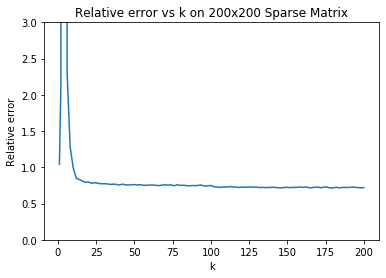

In [170]:
plt.errorbar(data['k'], data['err'], ecolor = 'black', capsize = 5)
plt.title("Relative error vs k on 200x200 Sparse Matrix")
plt.ylim([0, 3])
plt.ylabel("Relative error")
plt.xlabel("k")
plt.show()

Looking at the errors vs k, it seems the errors stabilize quite quickly after k is larger than ~25. 

Text(0.5, 0, 'k')

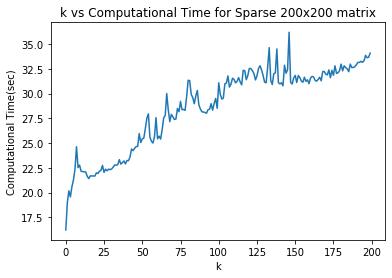

In [30]:
with open('Errors/brktime.txt', 'r') as f:
    x = f.read().split(', ')
x = [float(i) for i in x[:-1]]

plt.plot(range(200), x)
plt.title("k vs Computational Time for Sparse 200x200 matrix")
plt.ylabel("Computational Time(sec)")
plt.xlabel("k")

In [2]:
sfactor200 = np.random.choice(4, size=(200,4), p=np.array([0.7, 0.1, 0.1, 0.1]))
sweight200 = np.random.randint(0, 2, size=(4, 200))
data = np.matmul(sfactor200, sweight200)

In [6]:
A, S, error = mf(data, k = 4, s = 1, niter = 100, siter = 1000, solver = 'bgs')

In [7]:
print(error)

5.2870015314340035


In [8]:
datapath = 'Errors/itertests/*.txt'
datafiles = list(glob.glob(datapath))

In [36]:
for f in datafiles:
    os.rename(f, f[0:26] + "subiter1000err200.txt")

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'Errors/itertests\\alsiter100err200.txt' -> 'Errors/itertests\\alsiter10subiter1000err200.txt'

In [56]:
folder = 'Errors/tests3'
files = os.listdir(folder)
for f in files:
    os.rename(os.path.join(folder, f), os.path.join(folder, f[0:8] + 'subiter1000err200.txt'))

In [44]:
folder = 'Errors/itertests'
files = os.listdir(folder)
print(files[0:99])

['alsiter10err200.txt', 'alsiter11err200.txt', 'alsiter12err200.txt', 'alsiter13err200.txt', 'alsiter14err200.txt', 'alsiter15err200.txt', 'alsiter16err200.txt', 'alsiter17err200.txt', 'alsiter18err200.txt', 'alsiter19err200.txt', 'alsiter1err200.txt', 'alsiter20err200.txt', 'alsiter21err200.txt', 'alsiter22err200.txt', 'alsiter23err200.txt', 'alsiter24err200.txt', 'alsiter25err200.txt', 'alsiter26err200.txt', 'alsiter27err200.txt', 'alsiter28err200.txt', 'alsiter29err200.txt', 'alsiter2err200.txt', 'alsiter30err200.txt', 'alsiter31err200.txt', 'alsiter32err200.txt', 'alsiter33err200.txt', 'alsiter34err200.txt', 'alsiter35err200.txt', 'alsiter36err200.txt', 'alsiter37err200.txt', 'alsiter38err200.txt', 'alsiter39err200.txt', 'alsiter3err200.txt', 'alsiter40err200.txt', 'alsiter41err200.txt', 'alsiter42err200.txt', 'alsiter43err200.txt', 'alsiter44err200.txt', 'alsiter45err200.txt', 'alsiter46err200.txt', 'alsiter47err200.txt', 'alsiter48err200.txt', 'alsiter49err200.txt', 'alsiter4err2

In [49]:
files[0][0:9]

'alsiter10'